###new


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import pathlib
import random as rn
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import load_model
from sklearn.metrics import accuracy_score
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
data_dir = '/content/drive/MyDrive/Research_paper/dummy_data'
train_path = '/content/drive/MyDrive/Research_paper/dummy_data/train'
test_path = '/content/drive/MyDrive/Research_paper/dummy_data/Test'
height = 50
width = 50

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [ ]:
batch_size = 150
seed = 42

In [ ]:


train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='grayscale',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='grayscale',
                                                interpolation='hamming',
                                                subset='validation')

Found 7622 images belonging to 43 classes.
Found 1888 images belonging to 43 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

models = Sequential()
models.add(Conv2D(32, (3, 3), activation='relu', input_shape=(height,width, 1)))
models.add(MaxPooling2D((2, 2)))
models.add(Conv2D(64, (3, 3), activation='relu'))
models.add(MaxPooling2D((2, 2)))
models.add(Conv2D(128, (3, 3), activation='relu'))
models.add(MaxPooling2D((2, 2)))
models.add(Conv2D(128, (3, 3), activation='relu'))
models.add(MaxPooling2D((2, 2)))
models.add(Flatten())
models.add(Dense(512, activation='relu'))
models.add(Dense(43, activation='softmax'))

models.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = models.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=10,
                    validation_data=test_dataset,
                    validation_steps=len(test_dataset))

Epoch 1/10
51/51 [==============================] - 55s 1s/step - loss: 3.5130 - accuracy: 0.1102 - val_loss: 3.1258 - val_accuracy: 0.2516
Epoch 2/10
51/51 [==============================] - 54s 1s/step - loss: 1.5267 - accuracy: 0.5800 - val_loss: 1.5415 - val_accuracy: 0.5752
Epoch 3/10
51/51 [==============================] - 51s 996ms/step - loss: 0.6065 - accuracy: 0.8258 - val_loss: 1.3639 - val_accuracy: 0.6737
Epoch 4/10
51/51 [==============================] - 51s 1s/step - loss: 0.3288 - accuracy: 0.9075 - val_loss: 1.6815 - val_accuracy: 0.7362
Epoch 5/10
51/51 [==============================] - 74s 1s/step - loss: 0.1932 - accuracy: 0.9461 - val_loss: 1.2791 - val_accuracy: 0.7712
Epoch 6/10
51/51 [==============================] - 63s 1s/step - loss: 0.1268 - accuracy: 0.9650 - val_loss: 1.3601 - val_accuracy: 0.7521
Epoch 7/10
51/51 [==============================] - 51s 1s/step - loss: 0.0866 - accuracy: 0.9766 - val_loss: 1.6034 - val_accuracy: 0.7807
Epoch 8/10
51/51 

In [ ]:
score = models.evaluate_generator(test_dataset, verbose=1)
print('Test dataset accuracy: {}'.format(score[1]))

<ipython-input-8-397c01a19fa6>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = models.evaluate_generator(test_dataset, verbose=1)


13/13 [==============================] - 5s 361ms/step - loss: 1.4408 - accuracy: 0.8051
Test dataset accuracy: 0.805084764957428


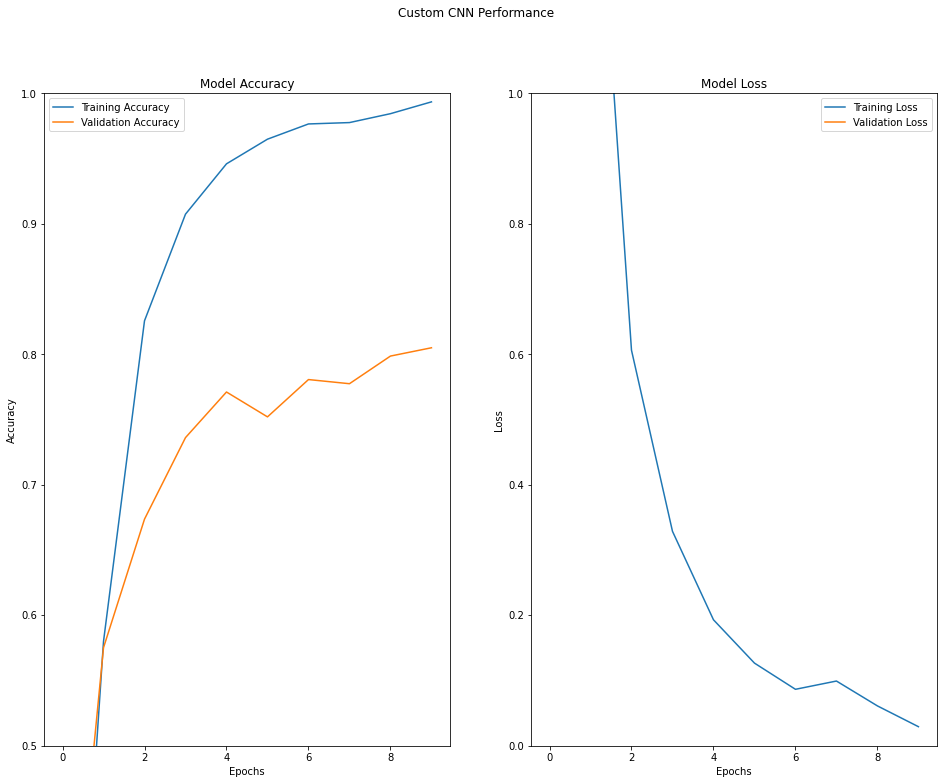

<Figure size 720x504 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [ ]:
def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
test_df = pd.read_csv(data_dir + '/Test.csv')

test_labels = test_df["ClassId"].values
imgs = test_df["Path"].values

data =[]

for img in imgs:
        try:
          image = cv2.imread(data_dir +'/'+img)
          image_fromarray = Image.fromarray(image, 'RGB')
          resize_image = image_fromarray.resize((height, width))
          data.append(np.array(resize_image))
        except:
          print("Error in " + img)

X_test = np.array(data)
X_test = X_test/255

5/5 [==============================] - 0s 33ms/step


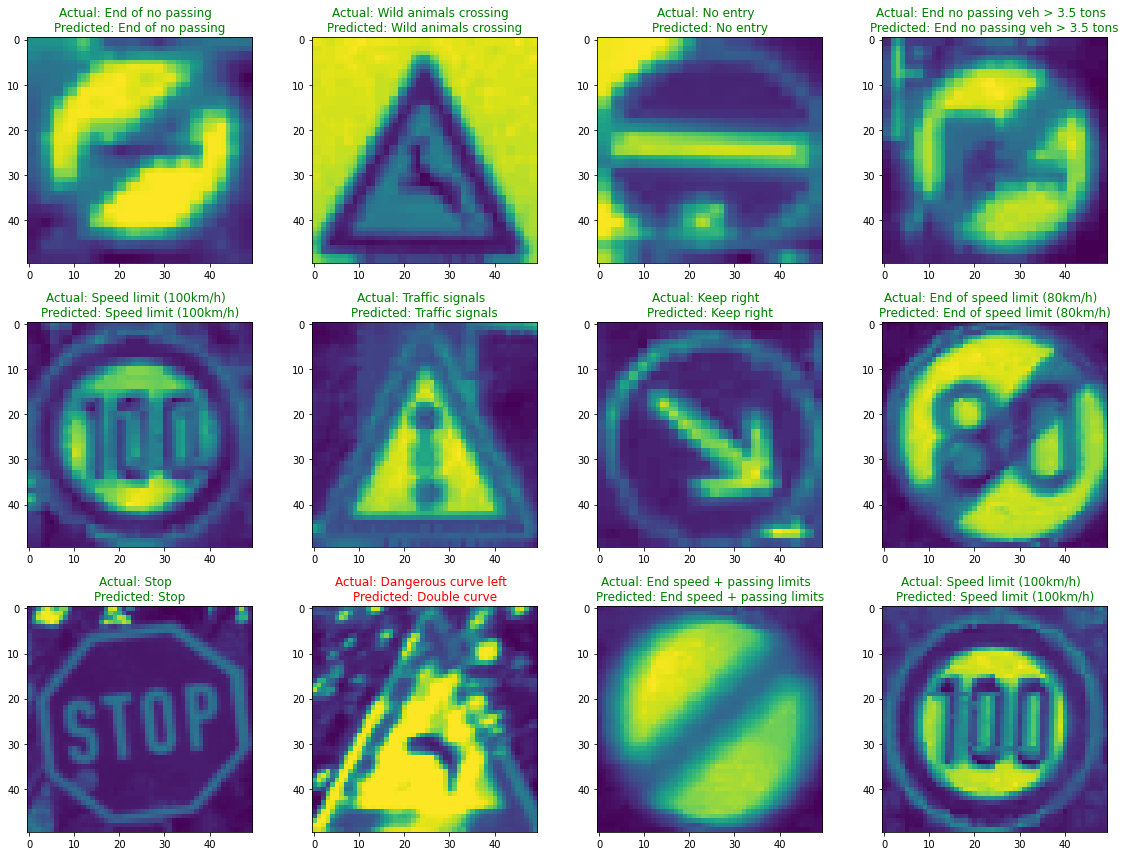

In [ ]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = models.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')
plt.tight_layout()

In [ ]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [ ]:
NUM_CLASS = 43
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',activation='relu', input_shape=(height,width, 1)))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASS, activation='softmax'))

model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit_generator(train_dataset,
                    validation_data=test_dataset,
                    epochs=15)

<ipython-input-7-f830b7c242f9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_dataset,


Epoch 1/15
51/51 [==============================] - 70s 1s/step - loss: 3.4841 - accuracy: 0.1120 - val_loss: 2.9054 - val_accuracy: 0.2966
Epoch 2/15
51/51 [==============================] - 54s 1s/step - loss: 1.5587 - accuracy: 0.5875 - val_loss: 1.8624 - val_accuracy: 0.6022
Epoch 3/15
51/51 [==============================] - 54s 1s/step - loss: 0.5995 - accuracy: 0.8361 - val_loss: 1.8003 - val_accuracy: 0.6600
Epoch 4/15
51/51 [==============================] - 53s 1s/step - loss: 0.3345 - accuracy: 0.9082 - val_loss: 1.9410 - val_accuracy: 0.6891
Epoch 5/15
51/51 [==============================] - 52s 1s/step - loss: 0.2054 - accuracy: 0.9446 - val_loss: 1.3789 - val_accuracy: 0.7548
Epoch 6/15
51/51 [==============================] - 57s 1s/step - loss: 0.1126 - accuracy: 0.9696 - val_loss: 1.6251 - val_accuracy: 0.7839
Epoch 7/15
51/51 [==============================] - 51s 1s/step - loss: 0.1012 - accuracy: 0.9747 - val_loss: 1.8481 - val_accuracy: 0.7712
Epoch 8/15
51/51 [==

In [ ]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),

    keras.layers.Dense(43, activation='softmax')

])

In [ ]:
alpha=0.01
epochs=15
optim = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=epochs,
                    validation_data=test_dataset,
                    validation_steps=len(test_dataset))

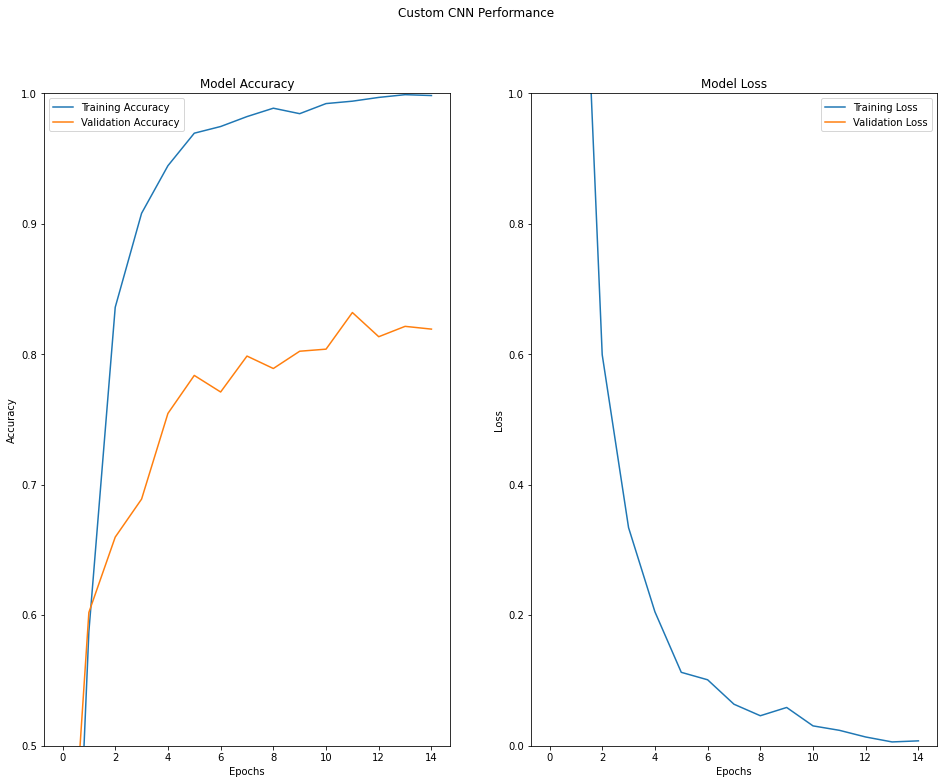

<Figure size 720x504 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [ ]:
def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
test_df = pd.read_csv(data_dir + '/Test.csv')

test_labels = test_df["ClassId"].values
imgs = test_df["Path"].values

data =[]

for img in imgs:
        try:
          image = cv2.imread(data_dir +'/'+img)
          image_fromarray = Image.fromarray(image, 'RGB')
          resize_image = image_fromarray.resize((height, width))
          data.append(np.array(resize_image))
        except:
          print("Error in " + img)

X_test = np.array(data)
X_test = X_test/255

In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

In [ ]:
import keras
model = keras.models.load_model('/content/drive/MyDrive/Research_paper/dummy_data/model_cnn.h5')

5/5 [==============================] - 0s 36ms/step


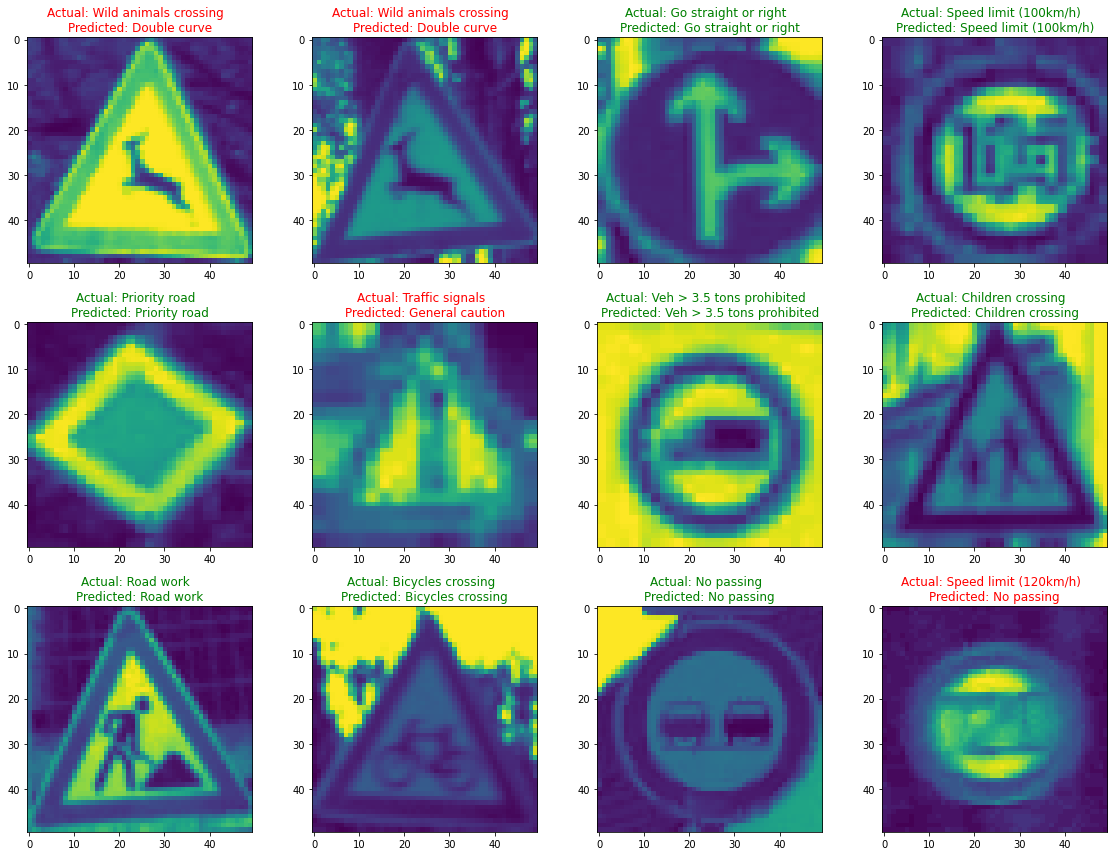

In [ ]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')
plt.tight_layout()

In [ ]:
model.save('/content/drive/MyDrive/Research_paper/dummy_data/model_cnn.h5')

In [ ]:
score = model.evaluate_generator(test_dataset, verbose=1)
print('Test dataset accuracy: {}'.format(score[1]))

<ipython-input-12-9ddb1985d7f5>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_dataset, verbose=1)


13/13 [==============================] - 5s 362ms/step - loss: 1.7786 - accuracy: 0.8194
Test dataset accuracy: 0.8193855881690979


In [ ]:
test_dataset.reset()
pred = model.predict_generator(test_dataset)
pred = np.argmax(pred, axis=1)

<ipython-input-38-4b9e55f69acf>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_dataset)


In [ ]:
from sklearn.metrics import classification_report
generator_idx_to_label_map = {v: k for k, v in test_dataset.class_indices.items()}
measures_by_class_str = classification_report(test_dataset.classes, pred, target_names=list(generator_idx_to_label_map.values()))
print(measures_by_class_str)

              precision    recall  f1-score   support

           0       0.02      0.05      0.03        39
           1       0.00      0.00      0.00        36
          10       0.00      0.00      0.00        39
          11       0.00      0.00      0.00        40
          12       0.03      0.03      0.03        40
          13       0.00      0.00      0.00        26
          14       0.02      0.03      0.03        36
          15       0.00      0.00      0.00        39
          16       0.00      0.00      0.00        52
          17       0.00      0.00      0.00        42
          18       0.05      0.07      0.05        45
          19       0.02      0.02      0.02        42
           2       0.03      0.06      0.04        18
          20       0.00      0.00      0.00        45
          21       0.05      0.07      0.06        42
          22       0.05      0.05      0.05        39
          23       0.03      0.04      0.04        46
          24       0.03    

In [ ]:
###new_data set

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = train_dataset
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation= 'vertical')
plt.show()